# Load data

In [2]:
# Step 1 — Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Step 2 — Load your Excel file
df = pd.read_csv("nashik data.csv")  # Make sure file is in same folder


In [3]:
df

,College,Branch,Category,Gender,Region,Technical/Non Technical,Round,Cutoff %
0,Gokhale Education Society's Sir Dr. M.S. Gosav...,Civil Engineering,OPEN,M,Home District,Non Technical,1,77.60
1,Gokhale Education Society's Sir Dr. M.S. Gosav...,Civil Engineering,SC,M,Home District,Non Technical,1,67.33
2,Gokhale Education Society's Sir Dr. M.S. Gosav...,Civil Engineering,NTB,M,Home District,Non Technical,1,72.60
3,Gokhale Education Society's Sir Dr. M.S. Gosav...,Civil Engineering,NTD,M,Home District,Non Technical,1,69.80
4,Gokhale Education Society's Sir Dr. M.S. Gosav...,Civil Engineering,OBC,M,Home District,Non Technical,1,74.00
...,...,...,...,...,...,...,...,...
2918,Late Bhausaheb Hiray Smarnika Samiti Trust San...,Electrical Engineering,SC,F,Other Than Home District,Non Technical,1,50.40
2919,Late Bhausaheb Hiray Smarnika Samiti Trust San...,Electrical Engineering,OPEN,M,Other Than Home District,Technical,1,78.00
2920,Late Bhausaheb Hiray Smarnika Samiti Trust San...,Electrical Engineering,OBC,M,Other Than Home District,Technical,1,74.80
2921,Late Bhausaheb Hiray Smarnika Samiti Trust San...,Electrical Engineering,SC,F,Other Than Home District,Technical,1,43.40


creating columns

In [4]:
# Step 3 — Simulate marks for training target (since old data doesn't have it)
np.random.seed(42)
df['Student_Marks'] = np.random.uniform(40, 100, len(df))

# Step 4 — Create target column (Yes=1, No=0)
df['Admission_Possible'] = (df['Student_Marks'] >= df['Cutoff %']).astype(int)

In [5]:
df

,College,Branch,Category,Gender,Region,Technical/Non Technical,Round,Cutoff %,Student_Marks,Admission_Possible
0,Gokhale Education Society's Sir Dr. M.S. Gosav...,Civil Engineering,OPEN,M,Home District,Non Technical,1,77.60,62.472407,0
1,Gokhale Education Society's Sir Dr. M.S. Gosav...,Civil Engineering,SC,M,Home District,Non Technical,1,67.33,97.042858,1
2,Gokhale Education Society's Sir Dr. M.S. Gosav...,Civil Engineering,NTB,M,Home District,Non Technical,1,72.60,83.919637,1
3,Gokhale Education Society's Sir Dr. M.S. Gosav...,Civil Engineering,NTD,M,Home District,Non Technical,1,69.80,75.919509,1
4,Gokhale Education Society's Sir Dr. M.S. Gosav...,Civil Engineering,OBC,M,Home District,Non Technical,1,74.00,49.361118,0
...,...,...,...,...,...,...,...,...,...,...
2918,Late Bhausaheb Hiray Smarnika Samiti Trust San...,Electrical Engineering,SC,F,Other Than Home District,Non Technical,1,50.40,65.357752,1
2919,Late Bhausaheb Hiray Smarnika Samiti Trust San...,Electrical Engineering,OPEN,M,Other Than Home District,Technical,1,78.00,58.175854,0
2920,Late Bhausaheb Hiray Smarnika Samiti Trust San...,Electrical Engineering,OBC,M,Other Than Home District,Technical,1,74.80,59.517708,0
2921,Late Bhausaheb Hiray Smarnika Samiti Trust San...,Electrical Engineering,SC,F,Other Than Home District,Technical,1,43.40,82.757280,1


In [6]:
df['Branch'].unique()

array(['Civil Engineering', 'Electrical Engineering',
       'Computer Engineering', 'Mechanical Engineering',
       'Electronics & Telecommunication Engineering', 'Mechatronics',
       'Artificial Intelligence & Machine Learning',
       'Information Technology', 'Chemical Engineering',
       'Computer Technology', 'Automobile Engineering',
       'Electronics & Computer Engineering'], dtype=object)

In [7]:
df['Technical/Non Technical'].unique()

array(['Non Technical', 'Technical'], dtype=object)

In [8]:
df['Region'].unique()

array(['Home District', 'Other Than Home District', 'State Level'],
      dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2923 entries, 0 to 2922
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   College                  2923 non-null   object 
 1   Branch                   2923 non-null   object 
 2   Category                 2923 non-null   object 
 3   Gender                   2923 non-null   object 
 4   Region                   2923 non-null   object 
 5   Technical/Non Technical  2923 non-null   object 
 6   Round                    2923 non-null   int64  
 7   Cutoff %                 2923 non-null   float64
 8   Student_Marks            2923 non-null   float64
 9   Admission_Possible       2923 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 228.5+ KB


In [10]:
df.describe()

,Round,Cutoff %,Student_Marks,Admission_Possible
count,2923.000000,2923.000000,2923.000000,2923.000000
mean,1.039685,74.330096,69.899019,0.421143
std,0.195252,12.303724,17.503795,0.493827
min,1.000000,35.600000,40.000698,0.000000
25%,1.000000,66.000000,54.546407,0.000000
50%,1.000000,76.000000,70.158226,0.000000
75%,1.000000,84.200000,85.182845,1.000000
max,2.000000,97.000000,99.983060,1.000000


# Label encoder 

In [11]:
# Step 5 — Encode categorical columns
encoders = {}
categorical_cols = ['College', 'Branch', 'Category', 'Gender', 'Region', 'Technical/Non Technical', 'Round']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [12]:
df

,College,Branch,Category,Gender,Region,Technical/Non Technical,Round,Cutoff %,Student_Marks,Admission_Possible
0,0,3,8,2,0,0,0,77.60,62.472407,0
1,0,3,11,2,0,0,0,67.33,97.042858,1
2,0,3,4,2,0,0,0,72.60,83.919637,1
3,0,3,6,2,0,0,0,69.80,75.919509,1
4,0,3,7,2,0,0,0,74.00,49.361118,0
...,...,...,...,...,...,...,...,...,...,...
2918,8,6,11,0,1,0,0,50.40,65.357752,1
2919,8,6,8,2,1,1,0,78.00,58.175854,0
2920,8,6,7,2,1,1,0,74.80,59.517708,0
2921,8,6,11,0,1,1,0,43.40,82.757280,1


In [13]:
df.describe()

,College,Branch,Category,Gender,Region,Technical/Non Technical,Round,Cutoff %,Student_Marks,Admission_Possible
count,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000
mean,9.485460,6.061923,8.307219,1.288744,0.499145,0.303113,0.039685,74.330096,69.899019,0.421143
std,6.490664,3.072687,2.963508,0.924660,0.612651,0.459682,0.195252,12.303724,17.503795,0.493827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.600000,40.000698,0.000000
25%,4.000000,4.000000,7.000000,0.000000,0.000000,0.000000,0.000000,66.000000,54.546407,0.000000
50%,9.000000,6.000000,8.000000,2.000000,0.000000,0.000000,0.000000,76.000000,70.158226,0.000000
75%,14.000000,9.000000,11.000000,2.000000,1.000000,1.000000,0.000000,84.200000,85.182845,1.000000
max,22.000000,11.000000,14.000000,2.000000,2.000000,1.000000,1.000000,97.000000,99.983060,1.000000


# fitting random forest classifier

In [14]:

# Step 6 — Prepare data for training
X = df.drop(columns=['Cutoff %', 'Admission_Possible'])
y = df['Admission_Possible']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7 — Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 8 — Show accuracy
y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))



Model Accuracy: 0.8700854700854701


# taking users input and shows list of possible collages 

In [15]:
# Step 9 — Take user input
user_branch = input("Enter your preferred branch (e.g., Computer Technology): ").strip()
user_category = input("Enter your category (e.g., OPEN, SC, NTB, OBC): ").strip()
user_gender = input("Enter your gender (M/F): ").strip().upper()
user_region = input("Enter your region (e.g.,Home District/ Other than home District): ").strip()
user_Technical_non_Technical = input("Enter Technical/Non Technical (e.g., Technical, Non Technical): ").strip()
user_marks = float(input("Enter your marks (%): "))


# Step 10 — Filter dataset for matching category, branch & gender
filtered_df = df[
    (df['Branch'] == encoders['Branch'].transform([user_branch])[0]) &
    (df['Category'] == encoders['Category'].transform([user_category])[0]) &
    (df['Gender'] == encoders['Gender'].transform([user_gender])[0]) &
    (df['Region'] == encoders['Region'].transform([user_region])[0]) & 
    (df['Technical/Non Technical'] == encoders['Technical/Non Technical'].transform([user_Technical_non_Technical])[0])
]

# Step 11 — Predict admission for each college in filtered set
possible_colleges = []
X_columns = X_train.columns  # Store training columns once


for idx, row in filtered_df.iterrows():
    student_data = row.copy()
    student_data['Student_Marks'] = user_marks  # Replace marks with student's marks
    
    # Ensure same columns as training
    student_data_for_model = student_data[X_columns]
    
    prediction = model.predict([student_data_for_model])[0]
    if prediction == 1:
        college_name = encoders['College'].inverse_transform([int(row['College'])])[0]
        possible_colleges.append(college_name)


# Step 12 — Show results
if possible_colleges:
    print("\nYour Admission is possible in following collages:")
    for i, college in enumerate(sorted(set(possible_colleges)), start=1):
        print(f"{i}. {college}")
else:
    print("\nNo colleges found for the given details.")

ValueError: could not convert string to float: ''

In [ ]:
prediction = {'Actual':y_test,'predicted':y_pred}
df = pd.DataFrame(prediction)
df

,Actual,predicted
1047,0,0
2394,1,1
1127,0,0
1392,0,0
679,1,1
...,...,...
685,1,0
691,0,0
2636,1,1
1178,1,1


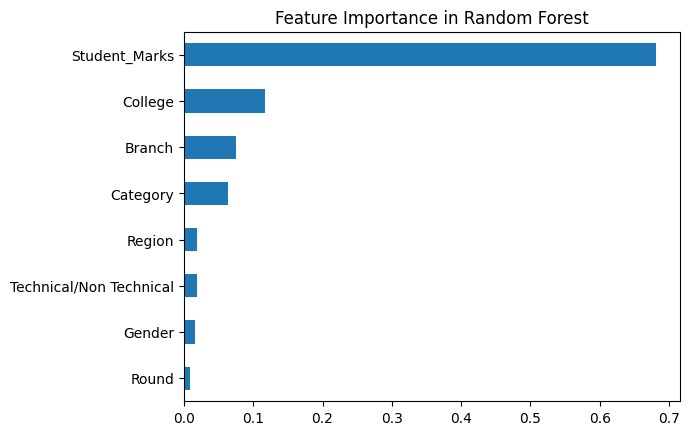

In [ ]:
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.sort_values(ascending=True).plot(kind='barh')
plt.title("Feature Importance in Random Forest")
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# X = StandardScaler().fit_transform(df.X)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3)

svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train, y_train)
print("Test Accuracy:", svm.score(X_test, y_test))

# Step 9 — Accuracy on training and test sets
train_predictions = svm.predict(X_train)
test_predictions = svm.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, train_predictions))
print("Test Accuracy:", accuracy_score(y_test, test_predictions))

Test Accuracy: 0.8437856328392246
Training Accuracy: 0.8592375366568915
Test Accuracy: 0.8437856328392246


In [ ]:
# Step 9 — Take user input
user_branch = input("Enter your preferred branch (e.g., Computer Technology): ").strip()
user_category = input("Enter your category (e.g., OPEN, SC, NTB, OBC): ").strip()
user_gender = input("Enter your gender (M/F): ").strip().upper()
user_region = input("Enter your region (e.g.,Home District/ Other than home District): ").strip()
user_Technical_non_Technical = input("Enter Technical/Non Technical (e.g., Technical, Non Technical): ").strip()
user_marks = float(input("Enter your marks (%): "))


# Step 10 — Filter dataset for matching category, branch & gender
filtered_df = df[
    (df['Branch'] == encoders['Branch'].transform([user_branch])[0]) &
    (df['Category'] == encoders['Category'].transform([user_category])[0]) &
    (df['Gender'] == encoders['Gender'].transform([user_gender])[0]) &
    (df['Region'] == encoders['Region'].transform([user_region])[0]) & 
    (df['Technical/Non Technical'] == encoders['Technical/Non Technical'].transform([user_Technical_non_Technical])[0])
]

# Step 11 — Predict admission & collect college + cutoff for ranking
possible_colleges = []
X_columns = X_train.columns

for idx, row in filtered_df.iterrows():
    student_data = row.copy()
    student_data['Student_Marks'] = user_marks
    
    student_data_for_model = student_data[X_columns]
    prediction = model.predict([student_data_for_model])[0]
    
    if prediction == 1:
        college_name = encoders['College'].inverse_transform([int(row['College'])])[0]
        cutoff_value = row['Cutoff']   # <-- use exact cutoff column name here
        possible_colleges.append((college_name, cutoff_value))

# Step 12 — Sort and show ranked list
if possible_colleges:
    # Sort based on cutoff (ascending)
    possible_colleges = sorted(possible_colleges, key=lambda x: x[1])
    
    print("\nYour Admission is possible in following colleges (Ranked):")
    for rank, (college, cutoff) in enumerate(possible_colleges, start=1):
        print(f"{rank}. {college}   (Cutoff: {cutoff})")
else:
    print("\nNo colleges found for the given details.")

In [16]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))
pickle.dump(encoders, open('encoders.pkl', 'wb'))